# Homework 2 Exercise 2 - Hierarchical Probabilistic Model

Brennan McFarland  
bfm21

Suppose we are building a population model as part of a scientific study for determining the survival rate of different species on an island.  Let us suppose the island contains foxes, rabbits, birds, carrots and seeds, and we want to model the proportion of any such species surviving to reproduction.  Since foxes eat rabbits and birds, rabbits eat carrots and birds eat seeds, let's suppose the survival rate of each species is dependent on the survival rate of its respective predator, forming a cause-and-effect relationship from predator to prey.  To make calculation slightly easier and better define the range we are interested in, let's say the island can support no more than 10,000 of any one species at a given moment.

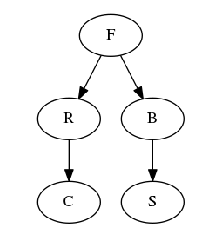

In [4]:
from graphviz import Digraph
import matplotlib.pyplot as plt
import matplotlib.image as imtool

image_format = 'png'
dot = Digraph(format=image_format)
dot.node('F', 'F')
dot.node('R', 'R')
dot.node('B', 'B')
dot.node('C', 'C')
dot.node('S', 'S')
dot.edges(['FR', 'FB', 'RC', 'BS'])
path = 'exercise2-graph'
dot.render(path)
imorg = imtool.imread(path + '.' + image_format)
plt.axis('off')
plt.imshow(imorg)

## Probabilities

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import math

max_pop = 10000
p_f = .6
p_r = .2
p_b = .3
p_c = .1
p_s = .05

print("Suppose that, given our previous knowledge about similar populations, we have the following prior probabilities:")
print("P(F) = ", p_f)
print("P(R) = ", p_r)
print("P(B) = ", p_b)
print("P(C) = ", p_c)
print("P(S) = ", p_s)



print("And we make an educated guess about the continuous conditional probabilities:")
# TODO


Suppose that, given our previous knowledge about similar populations, we have the following prior probabilities:
P(F) =  0.6
P(R) =  0.2
P(B) =  0.3
P(C) =  0.1
P(S) =  0.05
And we make an educated guess about the continuous conditional probabilities:


Let us define the corresponding Probabilistic Model in PyMC3 as follows:

In [90]:
import pymc3
from pymc3 import Bernoulli
from pymc3 import Beta
from pymc3.math import switch

model = pymc3.Model()

# TODO: bad values can make this outside the range of [0, 1], which causes it to crash
# need to play with these values until they return something reasonable
with model:
    Foxes = Beta('Foxes', alpha=2, beta=5)
    Rabbits = Beta('Rabbits', alpha=Foxes, beta=Foxes*5)
    Birds = Beta('Birds', alpha=Foxes*2, beta=Foxes*6)
    Carrots = Beta('Carrots', alpha=Rabbits*.7, beta=Rabbits*2)
    Seeds = Beta('Seeds', alpha=Birds*.3, beta=Birds*4)

(b) (using the same notebook) Use probability theory to derive a posterior distribution using
your previous example. Show this is consistent with what you obtain from the package.

## Sample Generation

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/home/user/.local/lib/python3.5/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [Seeds_logodds__, Carrots_logodds__, Birds_logodds__, Rabbits_logodds__, Foxes_logodds__]
100%|██████████| 10500/10500 [01:33<00:00, 111.80it/s]
There were 3853 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.5408511453625642, but should be close to 0.8. Try to increase the number of tuning steps.
There were 553 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


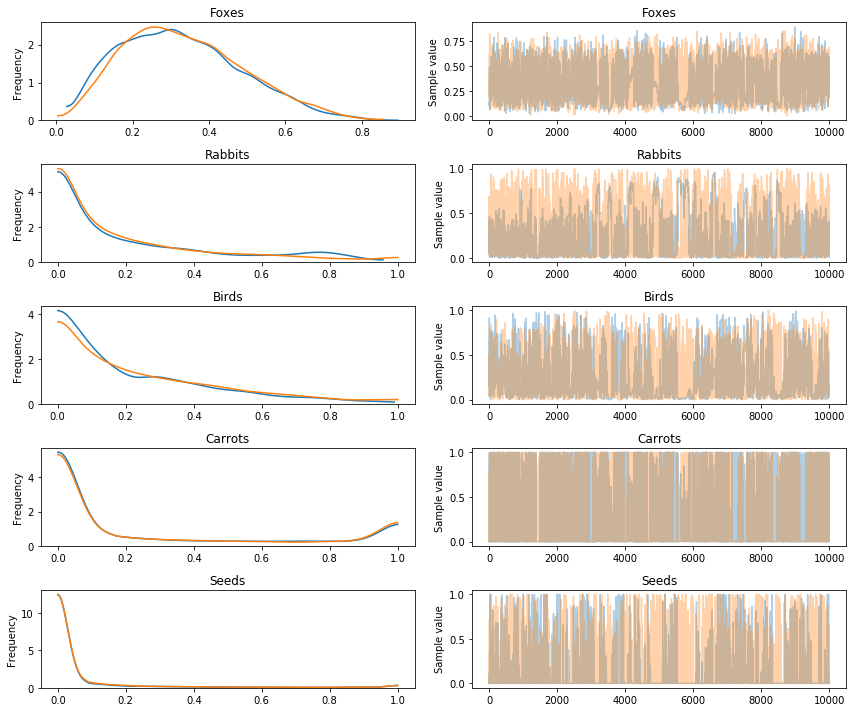

In [91]:
%matplotlib inline
samples = 10000
with model:
    trace = pymc3.sample(samples, chains=2)
    pymc3.traceplot(trace)

## Posterior Inference

In [21]:
def conditional_probability(trace, event, cond):
    # find all samples satisfy conditions
    for k, v in cond.items():
        trace = [smp for smp in trace if smp[k] == v]
    # record quantity of all samples fulfill condition
    nCondSample = len(trace)
    # find all samples satisfy event
    for k, v in event.items():
        trace = [smp for smp in trace if smp[k] == v]
    # calculate conditional probability
    return len(trace) / nCondSample

Now say for example we want to calculate the survival rate of foxes based on the survival rate of carrots and seeds:

## Variable Elimination